In [1]:
# import internal files
import emulators
import sample
import historymatch
import plot

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10})

import importlib
import time

In [2]:
ndim = 5

In [3]:
# define parameter space

#theta_0_vals = np.linspace(parameter_bounds[0,0], parameter_bounds[0,1], 100)
#theta_1_vals = np.linspace(parameter_bounds[1,0], parameter_bounds[1,1], 100)
#theta_2_vals = np.linspace(parameter_bounds[2,0], parameter_bounds[2,1], 100)

#theta_vals = np.concatenate((theta_0_vals.reshape(1,-1), theta_1_vals.reshape(1,-1), theta_2_vals.reshape(1,-1)), axis=0)

In [4]:
#parameter_bounds = np.ones((ndim,2))
#parameter_bounds[:,0] = -1*parameter_bounds[:,0]
#parameter_bounds[:,1] = 2*parameter_bounds[:,1]

# for 5D
parameter_bounds = np.ones((ndim,2))
parameter_bounds[:,0] = [-0.5, -5, -5, -5, 0]
parameter_bounds[:,1] = [0.5, 5, 5, 5, 0.5]

In [5]:
Nx = 10

def toy_model6D(theta_1, theta_2, theta_3, theta_4, theta_5, theta_6):
    
    x_bound = np.array([0.1, 0.5])
    Nx = 4
    xvals = np.linspace(x_bound[0], x_bound[-1], Nx)

    outputs =  []
    for x in xvals:
        output = theta_1 + theta_2*(x) + (theta_3**1)*(x**2) + theta_4*(x**3) \
               + theta_5*(10*x**4) + theta_6*(16*x**5)
        outputs.append(output)
    for x in xvals:
        output = -theta_1 + theta_2*np.sin(x) + theta_3*np.sin(2*x) + (theta_4**1)*np.cos(x) \
               + theta_5*np.cos(2*x) + theta_6*(x)
        outputs.append(output)
    return np.array(outputs)

def toy_model3D(theta_1, theta_2, theta_3):
    
    x_bound = np.array([0.1, 0.5])
    Nx = 4
    xvals = np.linspace(x_bound[0], x_bound[-1], Nx)

    outputs =  []
    for x in xvals:
        output = theta_1 + theta_2*(x) + (theta_3)*(x**2)
        outputs.append(output)
    for x in xvals:
        output = theta_1 + theta_2*np.sin(x) + theta_3*np.cos(2*x)
        outputs.append(output)
    return np.array(outputs)

def toy_model_5D(theta_0, theta_1, theta_2, theta_3, theta_4):
    
    x_bound = np.array([0.1, 1])
    Nx = 10
    xvals = np.linspace(x_bound[0], x_bound[-1], Nx)

    outputs =  []
    for x in xvals:
        output = theta_0 + theta_1*(x) + theta_2*(x**2) + theta_3*(x**3) + theta_4*(10*x**4)
        outputs.append(output)
    for x in xvals:
        output = theta_0 - theta_1*np.sin(x) + theta_2*np.cos(2*x) + theta_3*np.exp(x) + theta_4*(1/(2*x))
        outputs.append(output)
    return np.array(outputs)

In [6]:
# generate observational data with some uncertainty
true_parameters_3D = [-0.1, 0.3, 0.6]
true_parameters_6D = [-0.1, 0.3, 0.6, -0.8, 0.2, 0.15]
true_parameters_5D = [-0.1, 0.3, 0.6, -0.4, 0.15]

var_obs = 0.001 # observational uncertainty variance

error_obs = np.random.normal(0, np.sqrt(var_obs), 2*Nx)

obs_data = toy_model_5D(*true_parameters_5D) + error_obs

print(obs_data)

[-0.06424059 -0.01153057  0.04254632  0.15909343  0.27626294  0.40133016
  0.63594636  0.94459866  1.36742156  1.95254238  0.72063514  0.32866346
 -0.01165132 -0.23143851 -0.37959135 -0.61527878 -0.92946923 -1.08312109
 -1.3456441  -1.62523159]


In [7]:
nwaves = 4
ndim = 5

In [11]:
importlib.reload(historymatch)



# initialise history matching class
HM = historymatch.HistoryMatch(obs_data,
                               ndim, 'GP', 'hypercube')

In [12]:


ToyModel = historymatch.Simulator(HM)
ToyModel.set_simulator(toy_model_5D)

HM.set_observations(obs_data, np.sqrt(var_obs))
HM.initialize_volume(parameter_bounds[:,0], parameter_bounds[:,1])



In [13]:
start = time.time()
results = HM.run(nwaves=nwaves)

(5, 2)
(5, 2)
Running wave 1
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
(5, 2)
(5, 2)
Relative nonimplausible volume remaining: 0.024
Running wave 2
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
(5, 2)
(5, 2)
Relative nonimplausible volume remaining: 0.017
Running wave 3
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
(5, 2)
(5, 2)
Relative nonimplausible

In [14]:
end = time.time()
print(end - start)

164.77486515045166


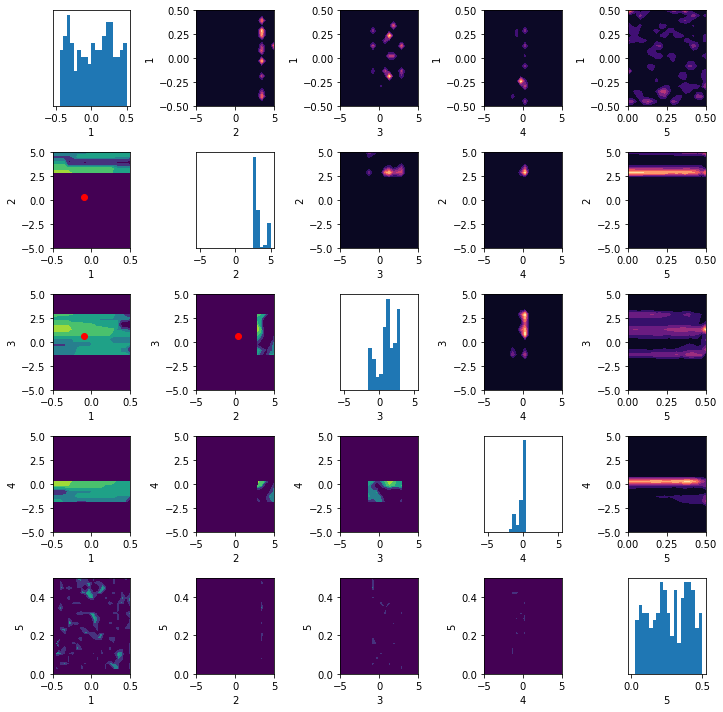

In [16]:
importlib.reload(plot)

fig, axes = plt.subplots(ndim,ndim,figsize=(10,10))
labels = ['1','2','3','4','5','6']
#plot.opticaldepth_1D(results.samples[0], parameter_bounds[0], parameter = 0, bins=20, Fig=(fig,ax1))
    
#plot.plot_implausibility2D(results.samples[0], parameter_bounds, [0,1], bins=20)

plot.plotcorner(results.samples[3], parameter_bounds, ndim, Fig=(fig,axes), labels=labels)
axes[1,0].scatter(true_parameters_3D[0],true_parameters_3D[1], color='red')
axes[2,0].scatter(true_parameters_3D[0],true_parameters_3D[2], color='red')
axes[2,1].scatter(true_parameters_3D[1],true_parameters_3D[2], color='red')

#plt.savefig('6D.png')

In [ ]:
def get_cov_ellipse(cov, centre, nstd, ax, color):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)
    
    width0, height0 = np.sqrt(np.abs(eigvals))

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(np.abs(eigvals))
    
    t = np.linspace(0, 2*np.pi, 100)
    Ell = np.array([0.5*width*np.cos(t) , 0.5*height*np.sin(t)]) 
    R_rot = np.array([[np.cos(theta) , -np.sin(theta)],[np.sin(theta), np.cos(theta)]])  
    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
    
    ax.plot( centre[0]+Ell_rot[0,:] , centre[1]+Ell_rot[1,:], color=color)
    
    return theta, width, height

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

#ax1.scatter(results.test_pts[3][:,0], results.test_pts[3][:,1], s=2, color='red', label='New samples')
ax1.scatter(results.regions[0][:,0], results.regions[0][:,1], s=3, color='cornflowerblue', label='Nonimp pts')


cov2D = np.cov(results.regions[2][:,0], results.regions[2][:,1])
nonimp_mean_x = np.mean(results.regions[2][:,0])
nonimp_mean_y = np.mean(results.regions[2][:,1])

nonimp_2D = np.concatenate((results.regions[2][:,0].reshape(-1,1), results.regions[2][:,1].reshape(-1,1)), axis=1)
mean2D = np.mean(nonimp_2D, axis=0)

theta, width, height = get_cov_ellipse(cov2D, [nonimp_mean_x, nonimp_mean_y], 3, ax1, 'orange')


nonimp_3D = np.concatenate((results.regions[2][:,0].reshape(-1,1), results.regions[2][:,1].reshape(-1,1), results.regions[2][:,2].reshape(-1,1)), axis=1)
cov3D = np.cov(np.stack((results.regions[2][:,0], results.regions[2][:,1], results.regions[2][:,2]), axis = 0))

mean3D = np.mean(nonimp_3D, axis=0)

for i in range(len(nonimp_2D)):
    M = np.sqrt((nonimp_2D[i] - mean2D).T.dot(np.linalg.inv(cov2D).dot((nonimp_2D[i] - mean2D))))
    #if M > 3:
        #ax1.scatter(nonimp_2D[i][0], nonimp_2D[i][1])

ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.legend(loc="best")

In [ ]:
X_3D_train = np.random.uniform(-1, 1, (20, 3))

X_3D_test = np.random.uniform(-1, 1, (5000, 3))

rx, ry, rz = np.linspace(-1, 1, 20), np.linspace(-1, 1, 20), np.linspace(-1, 1, 20)
gx, gy, gz = np.meshgrid(rx, ry, rz)

X_3D = np.c_[gx.ravel(), gy.ravel(), gz.ravel()]

Y_3D_train = model_eqn_1(0.1, X_3D_train[:,0], X_3D_train[:,1], X_3D_train[:,2])

In [ ]:
Y_3D_test = model_eqn_1(0.1, X_3D_test[:,0], X_3D_test[:,1], X_3D_test[:,2])

In [ ]:
#print(Y_3D_test)

In [ ]:
importlib.reload(emulators)
GP = emulators.Gaussian_Process(X_3D_train, X_3D_test, Y_3D_train)
mu1, cov1, sd1 = GP.emulate()
print(GP.sigma_f)
#print(mu1)

In [ ]:
GP.optimize()

In [ ]:
mu2, cov2, sd2 = GP.emulate()
print(GP.l)

z = -0.06387078

In [ ]:
print(sd1[0])
print(sd2[0])
print(mu1 - Y_3D_test)
print(mu2 - Y_3D_test)

In [ ]:
HMtest = historymatch.HistoryMatch(z,
                               3, 'GP', 'ellipsoid')

In [ ]:
imp1 = HMtest.implausibility(mu1, z, sd1, 0, var_obs)
imp2 = HMtest.implausibility(mu2, z, sd2, 0, var_obs)
print(imp1)
print(imp2)

In [ ]:
samp1 = np.concatenate((X_3D_test, imp1.reshape(-1,1)), axis=1)
samp2 = np.concatenate((X_3D_test, imp2.reshape(-1,1)), axis=1)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

plot.plot_implausibility2D(samp1, parameter_bounds, [0,1], bins=20, Fig=(fig, ax1), colorbar=False, 
                            labels=None, plot_kwargs=None)
plot.plot_implausibility2D(samp2, parameter_bounds, [0,1], bins=20, Fig=(fig, ax2), colorbar=False, 
                            labels=None, plot_kwargs=None)